In [238]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
from itertools import zip_longest

In [239]:
def get_llm_ratings(llm_rating_sources: list[str]) -> list[float]:
    """
    Get the average llm rating for a given source.
    Args:
        llm_rating_sources: list of llm rating sources. This is the dirname to start checking for csv files from.
                            Subdirectories will be checked starting from this directory.
    Return:
        List of all llm ratings for the given source.
        If multiple sources are given return the average rating across all sources.
    """
    all_source_ratings = []

    for source in llm_rating_sources:
        source = f"{os.path.dirname(os.path.abspath(os.getcwd()))}/../outputs/{source}"
        source_ratings = []
        
        # Traverse through the directory to find CSV files
        for root, _, files in os.walk(source):
            for file in files:
                if file.endswith(".csv"):
                    # Read the CSV file
                    file_path = os.path.join(root, file)
                    df = pd.read_csv(file_path)
                    
                    # Assuming the response column contains the dictionary of ratings as string
                    if 'response' in df.columns:
                        response = df['response'][0]

                        # Convert the response from string to a dictionary
                        response_dict = ast.literal_eval(response)
                        
                        # Extract ratings and append them to source_ratings
                        source_ratings = response_dict.values()
        
        if source_ratings:
            all_source_ratings.append(source_ratings)

    # Calculate average ratings
    zipped_lists = zip_longest(*all_source_ratings, fillvalue=None)
    llm_ratings = [
        sum(filter(None.__ne__, group)) / len(list(filter(None.__ne__, group)))
        for group in zipped_lists
    ]
    
    return llm_ratings

In [240]:
human_ratings = [5.722806985294119, 11.05916240409207, 10.176644957983195, 7.114928792569659, 6.099157439446366, 5.566299307958478, 17.45514241486068, 20.56654953560372, 14.074101604278075, 11.005892857142857, 10.182784926470589, 13.225643598615918, 15.510902476780188, 17.722190311418682, 17.559285294117643, 16.105406862745095, 14.799439705882353, 13.646433006535949, 13.32528431372549, 17.817691950464397, 19.465673010380623, 19.729349845201238, 17.95638080495356, 16.52333281733746, 15.829901960784314, 14.44470751633987, 11.858982352941178, 12.473614705882353, 13.266633126934982, 12.13799705882353, 11.304029411764708, 10.899100346020763, 11.029245098039217, 12.146807189542484, 12.750317647058825, 12.54380735294118, 13.642642647058825, 14.732547058823531, 16.67970261437908, 15.694006047873696, 15.648868512110726, 15.350144117647059, 15.374905882352943, 14.648437908496735, 12.62051797385621, 10.956928104575162, 9.631577030812325, 9.692333910034604, 8.245710784313728, 9.478299051857585, 12.43716563467492, 12.374813725490196, 12.402410130718955, 14.686942810457518, 15.052090073529412, 14.634486068111453, 18.123255882352943, 19.497089783281734, 19.749135294117647, 20.792210784313724, 21.082425696594427, 19.15788235294118, 18.07518137254902, 18.323945187165776, 19.19976989619377, 16.961331699346406, 14.677286377708977, 13.684705882352944, 15.826565015479877, 19.672383986928104, 21.969750865051907, 23.30329411764706, 24.561427601809957, 24.233156346749222, 24.545139705882352, 26.391583591331266, 26.473653594771243, 25.7525, 28.182441176470586, 30.907944444444443, 31.042676470588233, 29.05366666666667, 27.47116176470588, 26.843221227621484, 25.45178947368421, 24.945612299465243, 26.672071428571428, 26.546444272445818, 24.512742647058825, 24.267127450980393, 27.192478991596637, 33.16186425339367, 32.094166666666666, 29.6981, 28.632405462184874, 27.773249999999997, 26.992778546712803, 24.78235294117647, 23.85904411764706, 23.71569040247678, 24.106462848297216, 22.55586061381074, 22.374941176470585, 21.841009803921565, 20.480698529411768, 17.6074446366782, 14.44325541795666, 12.524396284829722, 11.880472549019608, 15.512207282913167, 20.616085139318887, 20.464073529411767, 21.093086687306506, 20.856195187165778, 17.839051470588235, 16.535029411764707, 15.656599439775912, 16.932544117647055, 22.179710294117648, 21.456007352941175, 20.117741830065363, 19.28415294117647, 18.910838235294122, 18.918298319327732, 17.779165266106443, 17.466493464052295, 19.231535294117645, 22.93496323529412, 26.49512254901961, 27.205697058823525, 30.007072192513373, 28.393787925696596, 26.85357352941176, 28.249730392156863, 27.244920168067228, 27.338547794117645, 26.54530588235294, 24.899828173374612, 22.83691176470588, 20.77564985994398, 20.51521568627451, 19.062049019607837, 16.592596638655465, 18.275367647058825, 27.905075, 29.334514705882352, 25.093589572192517, 19.447133126934983, 16.447647058823527, 19.058363636363637, 24.388437908496734, 26.278242647058825, 25.534026960784313, 29.21232549019608, 29.795710084033615, 24.86472910216718, 22.863725490196078, 20.7369692513369, 19.076182352941174, 18.517647058823528, 17.6023487394958, 14.94836111111111, 13.438740896358544, 16.105606209150327, 18.319954248366013, 18.078679411764707, 17.664794117647062, 17.06517513368984, 16.485388544891638, 14.427848755441453, 13.576512110726641, 12.017716176470588, 11.879204044117648, 12.809175, 17.503256535947713, 17.75494537815126, 18.65083823529412, 16.02368464052288, 14.073091176470587, 13.904702205882352, 13.971928571428572, 12.923748663101604, 12.225941176470588, 12.662591911764704, 12.602894117647057, 12.4060318627451, 12.417464985994396, 14.151664705882357, 16.339893557422972, 17.893362745098038, 19.200911764705882, 19.12337843137255, 17.371677941176475, 16.607595588235295, 17.630668730650154, 18.307455882352944, 18.467377941176473, 18.9919068627451, 20.069433823529412, 21.336068111455113, 22.731417956656344, 22.903745989304813, 21.71013088235294, 22.42164705882353, 23.16619117647059, 23.875465944272445, 24.320976890756302, 24.03204248366013, 26.109693771626297, 26.222119117647054, 25.410250700280113, 24.074558823529408, 24.078991176470588, 23.25504347826087, 21.991056722689073, 21.338450980392153, 20.9964375, 20.335875, 20.66961764705882, 23.344540106951875, 26.51085294117647, 26.013720588235294, 24.250387543252593, 21.990600840336132, 23.025572829131654, 25.236897058823526, 26.32927124183006, 26.120114186851215, 26.55146323529412, 26.839447058823527, 26.900848739495792, 26.29785294117647, 26.07654411764706, 26.037251633986934, 26.898101604278075, 33.81381833910035, 48.40757266435986, 53.42682843137255, 50.233819852941174, 51.924921568627454, 56.08438235294117, 59.119974789915965, 64.23566099071206, 75.36540896358544, 80.959, 85.98692794117648, 95.3404986631016, 100.96856617647059, 104.29738235294117, 107.63588051470587, 105.21067647058825, 102.231022875817, 103.0474814241486, 101.73784191176472, 102.93723529411764, 109.76126470588235, 105.01897181372549, 100.85559861591695, 98.2981950464396, 95.37922029456944, 88.44012383900929, 91.06242112299464, 97.15785139318886, 101.01073529411764, 100.60330555555554, 100.73289792387541, 96.95793252595156, 95.07487794117648, 94.74019117647059, 90.16191470588237, 80.02010147058823, 73.68095674740485, 67.8421388888889, 62.97488368983957, 61.147489164086686, 58.41641176470589, 56.10203460207612, 56.42993417366946, 54.690753869969036, 51.81656029411764, 55.88604024767801, 60.369505882352954, 63.258568181818184, 65.71950865051903, 69.30895847750865, 70.19432352941178, 68.85285166240409, 64.15298970588236, 60.50676315789474, 58.44099999999999, 57.931379256965954, 57.87941978609624, 57.260163235294115, 57.892364450127864, 64.26010084033614, 75.93474369747899, 79.10853970588235, 79.84661764705884, 80.14906699346403, 78.73512659846547, 80.78884852941178, 82.58434313725489, 77.31641176470586, 74.37791560102302, 69.61072727272726, 68.00538235294118, 68.49562834224598, 64.78805263157895, 65.41110681114553, 69.15733545539427, 71.53683823529411, 74.32562464985995, 75.17658403361345, 73.41823262032086, 70.05329901960782, 68.92875882352942, 65.90874264705883, 64.39923839009286, 64.80960947712418, 65.26220772058822, 65.31959442724458, 63.767246498599434, 63.6881544117647, 63.17291176470589, 63.206561764705896, 64.11639619377162, 66.3888161764706, 68.17158996539793, 66.71792647058822, 67.15861601307189, 69.07404144385026, 70.47444999999999, 75.52585154061623, 80.42727287581698, 83.9655795847751, 90.30962605042016, 96.34309967320263, 98.82436580882356, 98.93075386996904, 105.83735588235295, 117.33584313725491, 115.10439100346024, 110.06833823529412, 109.99914086687306, 112.26201038062285, 113.28615641711234, 119.9344792387543, 130.197075, 138.93484803921567, 160.56501764705882, 175.16024117647058, 177.82488088235294, 173.9028010380623, 172.35485994397757, 173.41732085561495, 174.48921148459382, 174.8938786764706, 177.56210620915033, 179.8769820261438, 186.9069598930481, 190.00573262032086, 187.5332771493213, 190.80463840830453, 191.67416470588233, 187.11683753501399, 184.9210089514066, 188.39724732620323, 191.07466830065357, 185.84813647058826, 185.2796047873695, 184.24081764705883, 178.19064901960786, 171.65868088235297, 166.3054607843137, 156.8334117647059, 149.46710695187167, 141.0820544117647, 132.4475277777778, 133.4323511029412, 137.71560934421615, 136.36293088235294, 132.74120728291317, 129.13788502673793, 128.90934313725492, 129.3448382352941, 124.2884814241486, 124.98641176470588, 127.4297149321267, 132.95456470588235, 143.21540660474716, 151.37776890756302, 157.96819362745103, 165.58177030812325, 181.4628273657289, 189.25946439628478, 190.46434117647058, 176.1628431372549, 150.24279721362228, 132.26847549019607, 121.65475605536331, 110.69548452012384, 100.93981764705885, 93.22973684210525, 86.00066408668731, 80.4442614379085, 75.58584256055366, 67.52603267973858, 61.81637925696595, 61.09287955182073, 61.245064616755805, 61.05702941176471, 61.013605882352934, 63.42195220588236, 64.37568797953965, 66.15234593837535, 67.92524019607843, 67.50347794117648, 68.59144537815125, 69.4542463235294, 69.21378208556149, 71.80952941176471, 67.92987955182072, 61.98466106442578, 52.874304812834225, 42.26799845201239, 43.57794117647059, 39.6671568627451, 39.98655882352941, 42.754394957983195, 49.93342647058824, 49.57645098039216, 45.58964999999999, 48.392751633986926, 50.793138235294116, 52.714708439897684, 52.38061764705883, 51.60355882352942, 50.22640712074303, 49.45389635854341, 52.57689366515837]

In [241]:
llm_rating_sources = ["bentz_experiment/standard/creative"]

llm_ratings = get_llm_ratings(llm_rating_sources)

C:\Users\alrea\AppData\Local\Temp\ipykernel_2392\246057544.py:41: DeprecationWarning: NotImplemented should not be used in a boolean context
  sum(filter(None.__ne__, group)) / len(list(filter(None.__ne__, group)))


In [242]:
USE_HUMAN_RATINGS = len(human_ratings) > 0

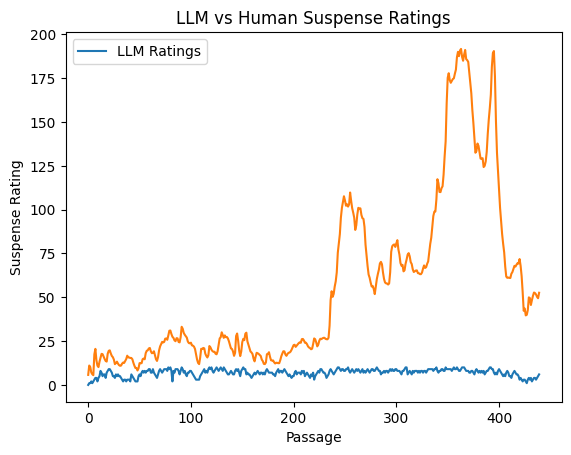

In [243]:
plt.plot(llm_ratings, label='LLM Ratings')

plt.title('LLM Suspense Ratings')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    plt.plot(human_ratings, label='Human Ratings')
    plt.title('LLM vs Human Suspense Ratings')

plt.show()

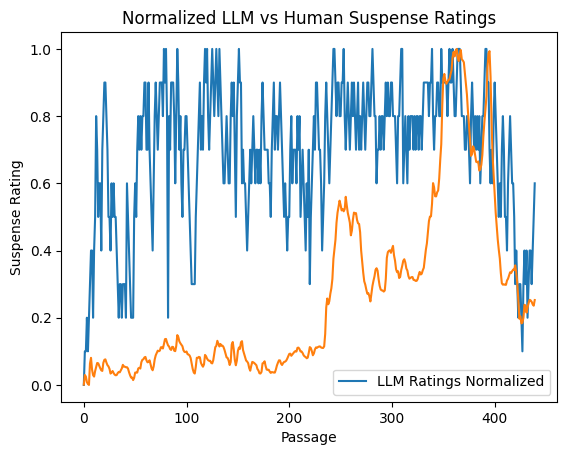

In [244]:
llm_ratings_norm = (np.array(llm_ratings) - np.min(llm_ratings)) / (np.max(llm_ratings) - np.min(llm_ratings))
plt.plot(llm_ratings_norm, label='LLM Ratings Normalized')

plt.title('Normalized LLM Suspense Ratings')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    human_ratings_norm = (np.array(human_ratings) - np.min(human_ratings)) / (np.max(human_ratings) - np.min(human_ratings))
    plt.plot(human_ratings_norm, label='Human Ratings Normalized')
    plt.title('Normalized LLM vs Human Suspense Ratings')
    
plt.show()

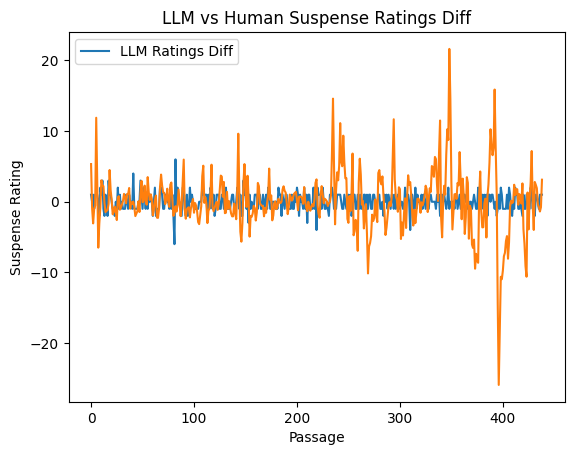

In [245]:
llm_ratings_diff = np.diff(llm_ratings)
plt.plot(llm_ratings_diff, label='LLM Ratings Diff')

plt.title('LLM Suspense Ratings Diff')
plt.xlabel('Passage')
plt.ylabel('Suspense Rating')
plt.legend()

if USE_HUMAN_RATINGS:
    human_ratings_diff = np.diff(human_ratings)
    plt.plot(human_ratings_diff, label='Human Ratings Diff')
    plt.title('LLM vs Human Suspense Ratings Diff')

plt.show()